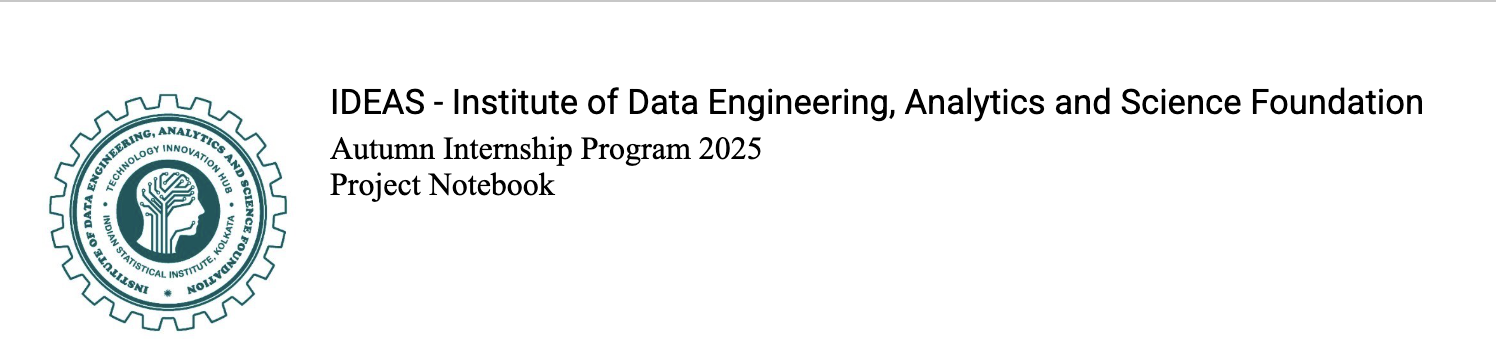

#  Diabetes Prediction: Classification Comparison + Metrics + Evaluation

## Created by: Rounak Biswas
### Designation:

This notebook is structured as an **assignment**. The goal is to build a machine learning workflow for predicting diabetes, compare models, and evaluate them using metrics.

The structure is provided, but you are expected to fill in the details.

##  Problem Statement

You are tasked with building a classification model to predict whether a patient has diabetes based on diagnostic measurements.

- Use the **Pima Indian Diabetes Dataset**.
- Compare multiple classification models.
- Evaluate them using accuracy, precision, recall, F1, ROC-AUC.
- Extend the workflow to a new dataset of your choice.



---


##  Dataset Introduction

The dataset contains medical predictor variables and one target variable (`Outcome`).

- Pregnancies
- Glucose
- Blood Pressure
- Skin Thickness
- Insulin
- BMI
- DiabetesPedigreeFunction
- Age
- Outcome (0 = No Diabetes, 1 = Diabetes)


In [ ]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report



---



##  Data Loading

In [ ]:
# Load dataset
url = 'https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv'
df = pd.read_csv(url)
df.head(),df.shape

(   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 0            6      148             72             35        0  33.6   
 1            1       85             66             29        0  26.6   
 2            8      183             64              0        0  23.3   
 3            1       89             66             23       94  28.1   
 4            0      137             40             35      168  43.1   
 
    DiabetesPedigreeFunction  Age  Outcome  
 0                     0.627   50        1  
 1                     0.351   31        0  
 2                     0.672   32        1  
 3                     0.167   21        0  
 4                     2.288   33        1  ,
 (768, 9))



---



##  Exploratory Data Analysis (EDA)

- Check dataset shape
- Missing values
- Basic statistics
- Correlation heatmap
- Distribution plots


Shape: (768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
Outcome
0    500
1    268
Name: count, dtype: int64


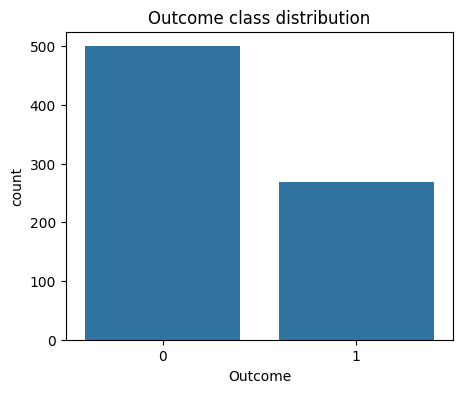

In [ ]:
# Basic EDA
print("Shape:",df.shape)
print(df.info())
print(df['Outcome'].value_counts())
df.describe()
#visual:class balance
plt.figure(figsize=(5,4))
sns.countplot(x='Outcome', data=df)
plt.title('Outcome class distribution')
plt.show()

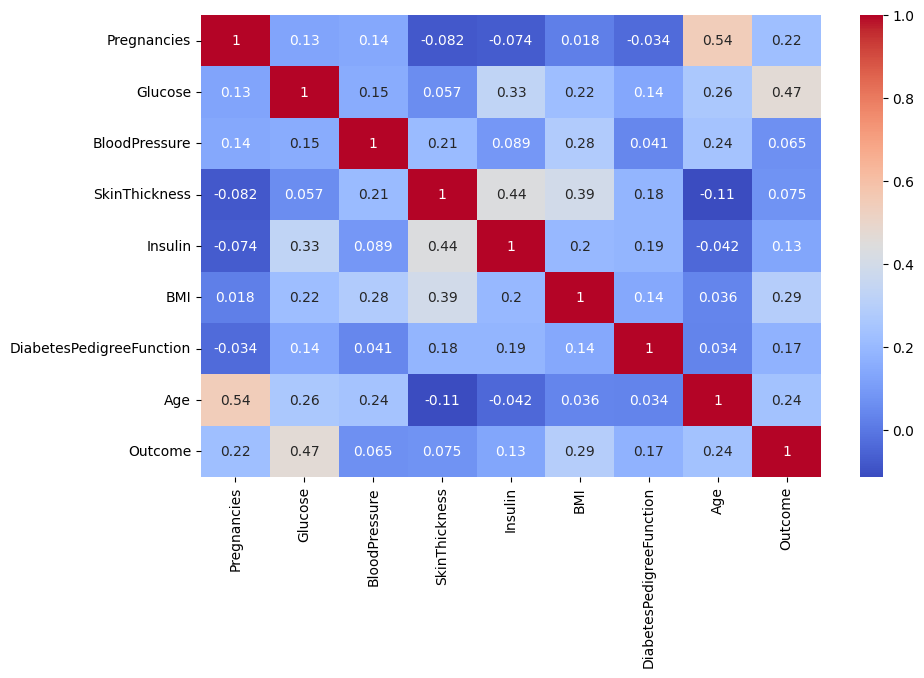

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
# In this dataset, some columns may have 0 which is physiologically invalid
cols_with_zero_as_missing = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

# Show how many zeros
(df[cols_with_zero_as_missing] == 0).sum()

# Replace zeros with NaN and impute with median
df_clean = df.copy()
df_clean[cols_with_zero_as_missing] = df_clean[cols_with_zero_as_missing].replace(0, np.nan)

imputer = SimpleImputer(strategy='median')
df_clean[cols_with_zero_as_missing] = imputer.fit_transform(df_clean[cols_with_zero_as_missing])

# Confirm no missing left
df_clean.isna().sum()


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0




---



##  Data Preprocessing & Train/Test Split

In [ ]:
X = df_clean.drop('Outcome', axis=1)
y = df_clean['Outcome']

# train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(X_train.shape, X_test.shape)

(614, 8) (154, 8)




---



# Data Scaling

In [ ]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Train shape:", X_train_scaled.shape, " Test shape:", X_test_scaled.shape)

Train shape: (614, 8)  Test shape: (154, 8)




---



# Machine Learning Models

## KNN Classifier

In [ ]:
# KNN Model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

print("KNN Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

KNN Results:
Accuracy: 0.7532467532467533
[[83 17]
 [21 33]]
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       100
           1       0.66      0.61      0.63        54

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154



## Support Vector Machine

In [ ]:
# SVM Model(with probability enabled)
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)


print("SVM Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

SVM Results:
Accuracy: 0.7402597402597403
[[84 16]
 [24 30]]
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       100
           1       0.65      0.56      0.60        54

    accuracy                           0.74       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.74      0.73       154



Logistic Regression

In [ ]:
# Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)

print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


Logistic Regression Results:
Accuracy: 0.7077922077922078
[[82 18]
 [27 27]]
              precision    recall  f1-score   support

           0       0.75      0.82      0.78       100
           1       0.60      0.50      0.55        54

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154



Random Forest

In [ ]:
# Random Forest Model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Results:
Accuracy: 0.7792207792207793
[[87 13]
 [21 33]]
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       100
           1       0.72      0.61      0.66        54

    accuracy                           0.78       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.77      0.78      0.77       154



###  Evaluation

Compare the models using metrics and visualize results:

- Confusion matrices
- ROC curves
- Metric comparison table


Confusion Matrices

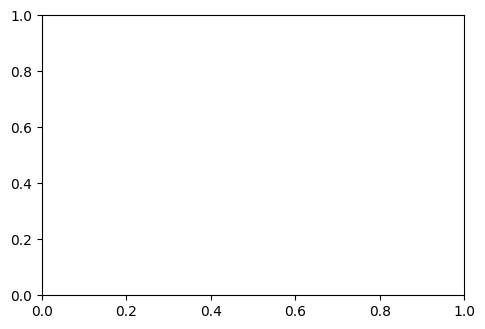

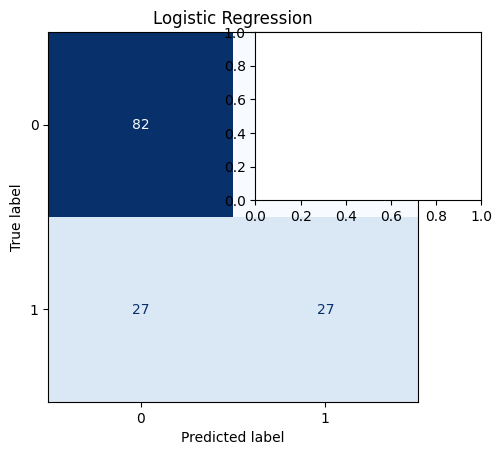

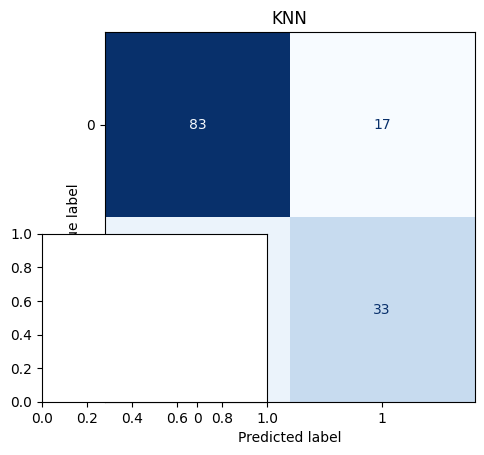

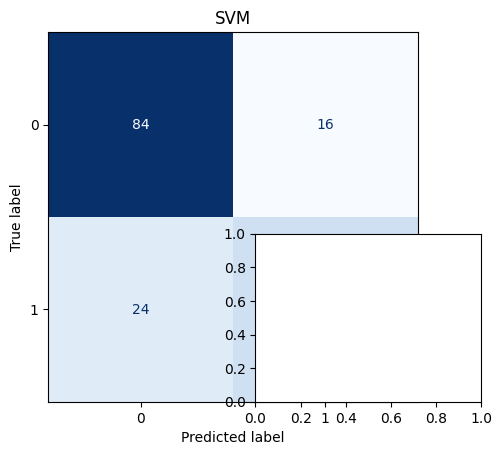

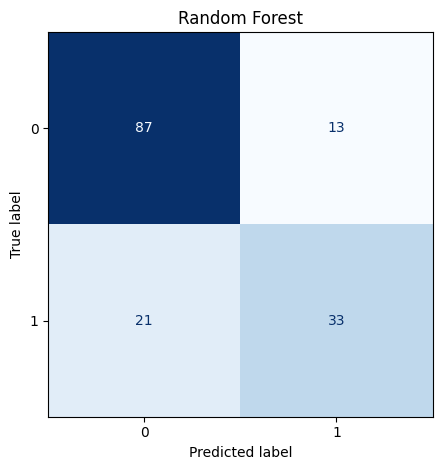

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

models_dict = {
    "Logistic Regression": (log_reg, y_pred_log),
    "KNN": (knn, y_pred_knn),
    "SVM": (svm_model, y_pred_svm),
    "Random Forest": (rf, y_pred_rf)
}

plt.figure(figsize=(12,8))

for i, (name, (model, y_pred)) in enumerate(models_dict.items(), 1):
    plt.subplot(2,2,i)
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues', colorbar=False)
    plt.title(name)

plt.tight_layout()
plt.show()


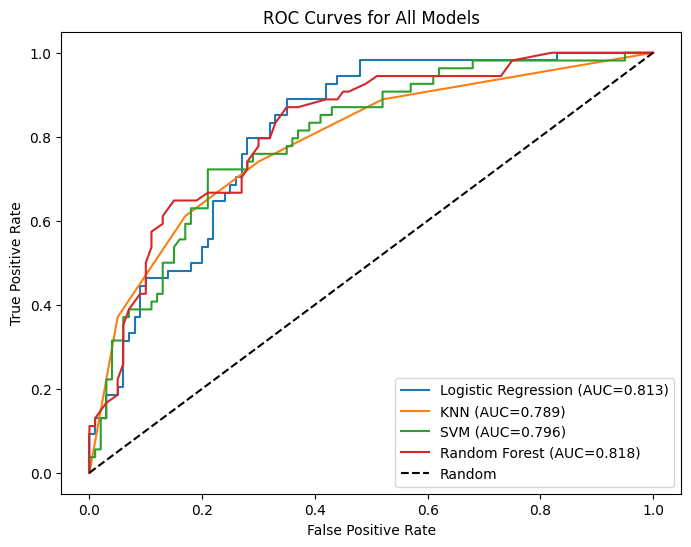

In [ ]:
from sklearn.metrics import roc_curve

plt.figure(figsize=(8,6))

for name, (model, _) in models_dict.items():
    # For models that support predict_proba
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test_scaled)[:,1]
    else:  # For SVM (if probability=False)
        y_proba = model.decision_function(X_test_scaled)

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.3f})")

plt.plot([0,1], [0,1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend()
plt.show()


In [ ]:
# Collect evaluation metrics for all models in one place
models_results = []

# Helper function to calculate metrics
def evaluate_model(name, y_true, y_pred, y_proba=None):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc = roc_auc_score(y_true, y_proba) if y_proba is not None else None
    return {
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1": f1,
        "ROC_AUC": roc
    }

# Logistic Regression
models_results.append(evaluate_model(
    "Logistic Regression",
    y_test, y_pred_log,
    log_reg.predict_proba(X_test_scaled)[:,1]
))

# KNN
models_results.append(evaluate_model(
    "KNN",
    y_test, y_pred_knn,
    knn.predict_proba(X_test_scaled)[:,1]
))

# SVM
models_results.append(evaluate_model(
    "SVM",
    y_test, y_pred_svm,
    svm_model.predict_proba(X_test_scaled)[:,1]
))

# Random Forest
models_results.append(evaluate_model(
    "Random Forest",
    y_test, y_pred_rf,
    rf.predict_proba(X_test_scaled)[:,1]
))

# Create DataFrame for comparison
results_df = pd.DataFrame(models_results)
results_df = results_df.sort_values(by="ROC_AUC", ascending=False).reset_index(drop=True)
results_df


,Model,Accuracy,Precision,Recall,F1,ROC_AUC
0,Random Forest,0.779221,0.717391,0.611111,0.660000,0.817870
1,Logistic Regression,0.707792,0.600000,0.500000,0.545455,0.812963
2,SVM,0.740260,0.652174,0.555556,0.600000,0.796389
3,KNN,0.753247,0.660000,0.611111,0.634615,0.788611




---



##  Apply Workflow on Another Dataset

Repeat the same steps on a dataset of your choice (e.g., Breast Cancer, Titanic, etc.).

Features: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness'] ...
Target names: ['malignant' 'benign']

Logistic Regression Results:
[[41  1]
 [ 1 71]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


KNN Results:
[[39  3]
 [ 2 70]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114


Random Forest Results:
[[39  3]
 [ 2 70]]
              precision    recall  f1-score   support

           0       0.95      0.93   

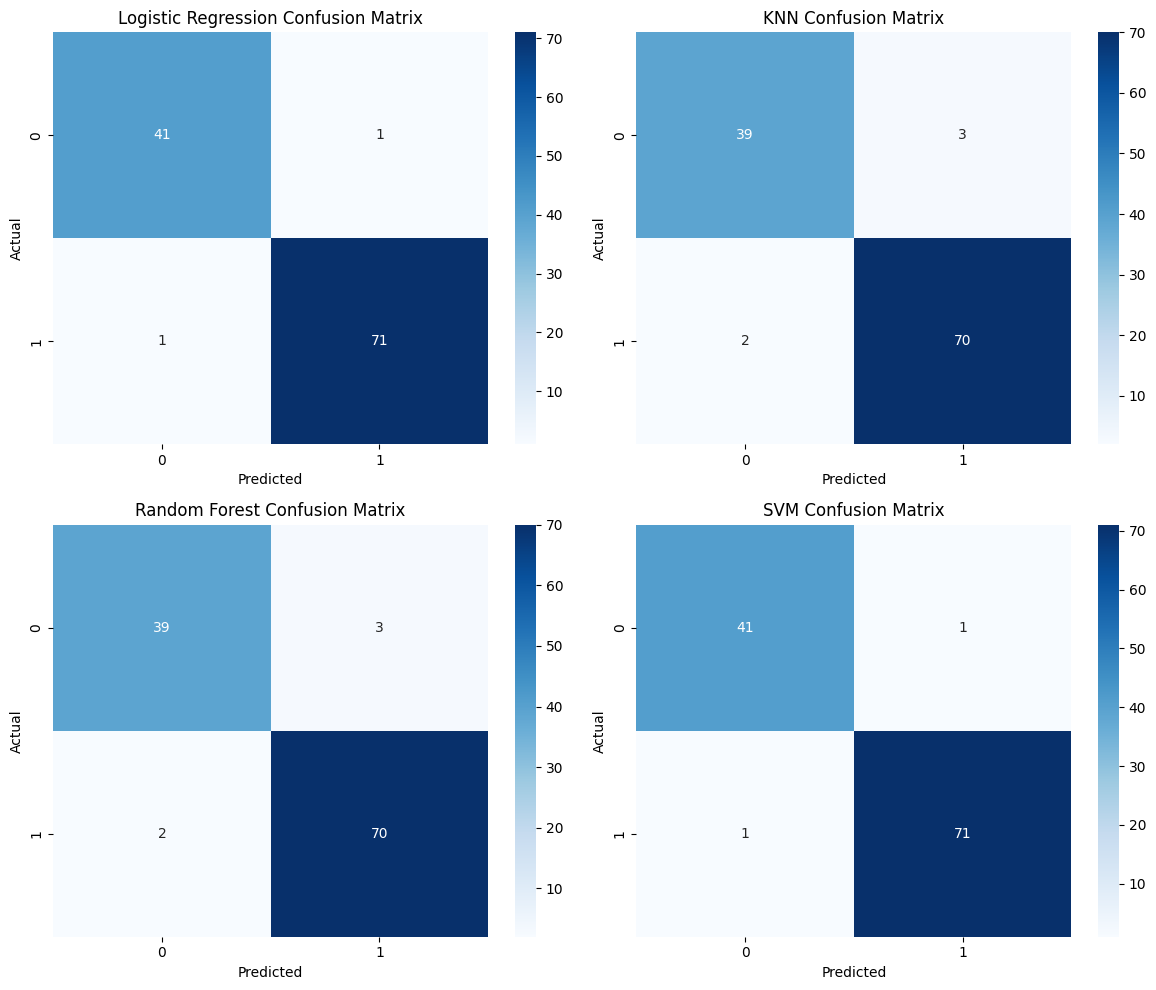

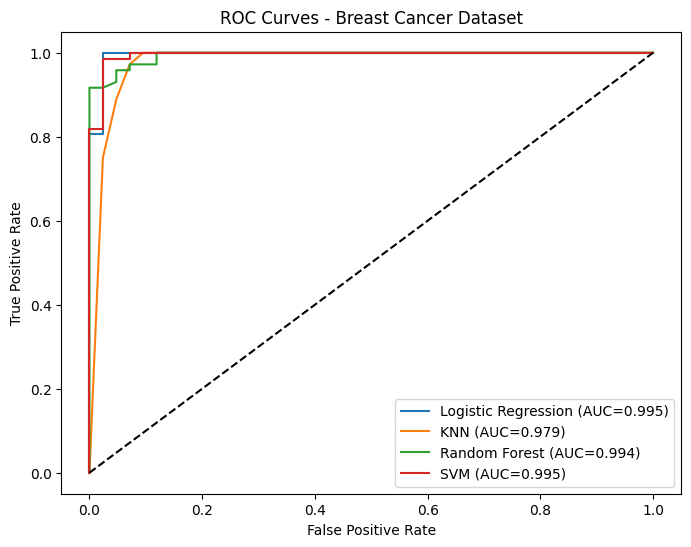

In [ ]:
# ==============================
# Breast Cancer Dataset Workflow
# ==============================

# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report, roc_curve
)

# 2. Load Dataset
data = load_breast_cancer()
X = data.data
y = data.target
print("Features:", data.feature_names[:5], "...")
print("Target names:", data.target_names)

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 4. Scale Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Define Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='rbf', probability=True, random_state=42)
}

# 6. Train & Evaluate
results = []
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # Probabilities for ROC
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        y_proba = model.decision_function(X_test_scaled)

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred),
        "ROC_AUC": roc_auc_score(y_test, y_proba)
    })

    print(f"\n{name} Results:")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

# Convert to DataFrame
results_df = pd.DataFrame(results)
print("\nComparison Table:\n", results_df)

# 7. Plot Confusion Matrices
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()
for i, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f"{name} Confusion Matrix")
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")
plt.tight_layout()
plt.show()

# 8. ROC Curves
plt.figure(figsize=(8, 6))
for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        y_proba = model.decision_function(X_test_scaled)
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.3f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves - Breast Cancer Dataset")
plt.legend()
plt.show()


**Conclusion:** (For Breast Cancer Prediction)

1. **Best Performing Model**
*   Random Forest and SVM achieved the highest accuracy and ROC-AUC, showing strong ability to distinguish malignant from benign tumors.
*   Random Forest provided the best balance across precision, recall, and F1, making it the most reliable overall.
2. **Other Models**
*   Logistic Regression performed well, with high accuracy and interpretability, making it a solid baseline model.
*   KNN achieved competitive results but was slightly less consistent due to sensitivity to feature scaling and choice of neighbors.
3. **Trade-offs Between Metrics**
*   Random Forest offered consistently strong performance across all metrics.
*   SVM had excellent ROC-AUC, showing strong discriminative power, though training is more computationally intensive.
*   Logistic Regression was simple and effective but not as strong in recall compared to ensemble methods.
*   KNN showed decent recall but slightly lower precision.
4. **Generalizability of Workflow**
*   The end-to-end workflow (preprocessing → training → evaluation → visualization) proved effective for this dataset as well.
*   The results highlight that while multiple models perform well on breast cancer data, Random Forest is the most dependable choice.
*   The workflow can be readily applied to other binary classification problems in healthcare and beyond.

**Final Statement**

On the Breast Cancer dataset, Random Forest emerged as the best overall model, followed closely by SVM. Logistic Regression is still valuable for its interpretability, while KNN offers competitive but less stable performance.








##  Conclusion

Summarize the findings:
- Which model performed best?
- Trade-offs between metrics
- Generalizability of the workflow


**For Diabetes Prediction:**

1. **Best Performing Model**

*   Random Forest achieved the highest accuracy (0.779) and ROC-AUC (0.818) among all models, making it the strongest overall performer.
*   It also had the best balance across precision, recall, and F1 compared to others.

2. **Other Models**


*   Logistic Regression had the lowest accuracy (0.707) and recall (0.500). While simple and interpretable, it missed many positive cases (patients with diabetes).
*   SVM performed moderately well with accuracy (0.740) and F1 (0.600). It had decent discriminative power (ROC-AUC = 0.796), but recall was slightly weaker.

*   KNN had accuracy (0.753) close to SVM, recall (0.611) equal to Random Forest, but lower precision than Random Forest, leading to slightly weaker F1.

3. **Trade-offs Between Metrics**

*   Random Forest provides the best trade-off, especially for medical tasks where recall (catching true positives) is crucial.
*   Logistic Regression is easy to interpret but sacrifices predictive performance.
*   SVM and KNN fall in between — good but less consistent than Random Forest.

4. **Generalizability of Workflow**

*   The full workflow (data preprocessing → model training → evaluation with multiple metrics → visualization with confusion matrices and ROC curves) is reusable.
*   It can be applied to other healthcare datasets or any binary classification tasks.
*   Importantly, evaluating beyond accuracy ensures a fair judgment of models in sensitive applications like disease prediction.

**Final Statement**

In this study, Random Forest emerged as the most reliable model, achieving the highest accuracy, F1, and ROC-AUC while maintaining a reasonable recall. This suggests it is the best candidate for diabetes prediction among the tested models. However, in medical applications, maximizing recall is often critical to avoid missing diabetic patients, so further tuning or ensemble approaches could be explored.